# Run a single optimization

This page contains a very simple tutorial to run a single optimizer.
Even though many folks have probably run a single local optimizer many times, this is meant to familiarize users with the basic API using the package.
Mystic has a plug-and-play API and the user can define many custom optimations, termination conditions, etc.
In this tutorial, we focus on how to apply readily available out-of-the-box options instead of describing how to design new options.
After this basic introduction, we will then progress to multi-dimensional cost functions, multi-processing, and using a shared database.

The key concepts you should gain from this page:
 * How to define a cost function.
 * How to use an optimization algorithm to find the minimum of the cost function.
 * What are the available optimization algorithms.
 * What are the available optimization termination conditions.

## Define a cost function

Similar to other packages like scipy, Mystic can optimize a Python function.
For example, below we define a cost function, called ``cost_func(*p)``, which takes a list of parameters ``p``.
This function specifies an inverted Gaussian using scipy.
In the section below, we will show how to find the minimum of this function.

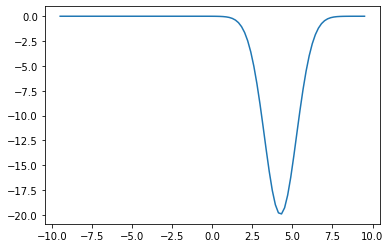

In [3]:
import matplotlib.pyplot as plt
import numpy
from scipy import stats

def cost_func(*p):
    """ Executed for each set of drawn parameters in the optimization search.
    """

    # get the x value from Mystic
    # p is a list so we take the 0-th index of the list
    x = p[0]

    # get value at inverted Gaussian function x
    # the Gaussian peak is at 4.25
    var = stats.multivariate_normal(mean=[4.25], cov=[[1]])
    stat = -50.0 * var.pdf([x])

    # whether to flip sign of function
    # a positive lets you search for minimum
    # a negative lets you search for maximum
    stat *= 1.0

    return stat

# plot the function between -9.5 and 9.5
x = numpy.linspace(-9.5, 9.5, 100)
plt.plot(x, [cost_func(i) for i in x])

# show the plot
plt.show()

## Run an opitimizer

Now that we have a function to optimize, we need to define a solver which implements a local optimization.
Below we choose to create a local optimization using the Powell method.
There are a two important options to set for the solver:

 1. **initial points**: Sets the initial position of the local optimizer using ``SetInitialPoints``.

 2. **strict ranges**: Sets the bounds for the parameters using ``SetStrictRages``.
 
The optimizer will also need a **termination condition**.
The termination conditions tells when the stop executing the local optmization.
This is set when the user calls ``Solve`` which executes the optimization.
 
 When you run this snippet, you should notice that the best parameter corresponds to 4.25 which is the minimum of our inverted Gaussian defined above in ``cost_func``.

In [17]:
from mystic import tools
from mystic.solvers import PowellDirectionalSolver
from mystic.ensemble import BuckshotSolver
from mystic.termination import VTR

# set random seed so we can reproduce results
tools.random_seed(0)

# create a solver
solver = PowellDirectionalSolver(1)

# set the initial position to 1
solver.SetInitialPoints([1])

# set the range to search for the parameter between -9.5 and 9.5
solver.SetStrictRanges((-9.5,), (9.5,))

# find the minimum
# pass the termination condition
solver.Solve(cost_func, VTR())

# print the best parameters
print(f"The best solution is {solver.bestSolution}")

The best solution is [4.25000001]


We can plot the minimum overlaid on the cost function.
In the plot below, the vertical line is our solution.

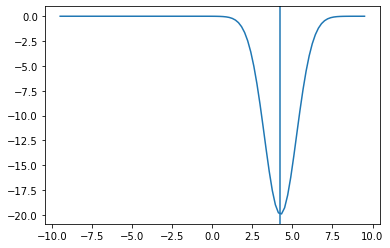

In [21]:
x = numpy.linspace(-9.5, 9.5, 100)
plt.plot(x, [cost_func(i) for i in x])
plt.axvline(solver.bestSolution[0])
plt.show()

## Available optimization algorithms

There are a couple global and local optimizers available in Mystic, the global optimization algorithms are:
 * ``DifferentialEvolutionSolver``: Differential Evolution algorithm.
 * ``DifferentialEvolutionSolver2``: Price & Storn's Differential Evolution algorithm.

And the local optimization algorithms are:
 * ``PowellDirectionalSolver`` : Powell's (modified) Level Set algorithm.
 * ``NelderMeadSimplexSolver``: Nelder-Mead Simplex algorithm.

Below we show how to use the global optimization algorithms to solve the same inverted Gaussian cost function.

In [22]:
from mystic.solvers import DifferentialEvolutionSolver
from mystic.solvers import DifferentialEvolutionSolver2
from mystic.solvers import NelderMeadSimplexSolver

# set random seed so we can reproduce results
tools.random_seed(0)

# loop over different solvers
for cls in [DifferentialEvolutionSolver,
            DifferentialEvolutionSolver2]:
    
    # create a solver
    # note there is a second argument here
    # this is the population size set to 20
    solver = cls(1, 20)

    # set the initial position to 1
    solver.SetInitialPoints([1])

    # set the range to search for the parameter between -9.5 and 9.5
    solver.SetStrictRanges((-9.5,), (9.5,))

    # find the minimum
    # pass the termination condition
    solver.Solve(cost_func, VTR())
    
    # print the best solution
    print(f"The {cls.__name__} best solution is {solver.bestSolution[0]}")

The DifferentialEvolutionSolver best solution is 4.249999998671815
The DifferentialEvolutionSolver2 best solution is 4.250000003848005


## Available termination conditions

Above, we had shown that you use the ``VTR`` termination condition to tell the optimization algorithm when to stop.
There are quite a few termination conditions available in Mystic. Here, we list some:
 * ``NormalizedChangeOverGeneration``: A termination condition.
 
Below we show how to use several of those termination conditions.

In [23]:
from mystic.termination import NormalizedChangeOverGeneration

# set random seed so we can reproduce results
tools.random_seed(0)

# create a solver
solver = PowellDirectionalSolver(1)

# set the initial position to 1
solver.SetInitialPoints([1])

# set the range to search for the parameter between -9.5 and 9.5
solver.SetStrictRanges((-9.5,), (9.5,))

# find the minimum
# pass the termination condition
solver.Solve(cost_func, NormalizedChangeOverGeneration())

# print the best parameters
print(f"The best solution is {solver.bestSolution}")


The best solution is [4.25000001]


Now that you have a understanding of how to use a single optimizer, on the next page we will move on to multi-dimensional cost functions and running multiple optimizers in a search.